# Standardization
* When data can take on any range of values, it makes it difficult to interpret. Therefore, data scientists will convert the data into a standard format to make it easier to understand. 
* The standard format refers to data that has 0 mean and unit variance (i.e. standard deviation = 1)
* For each data value, x, we subtract the overall mean of the data, μ, then divide by the overall standard deviation, σ. 

<center>
    <h1>z=(x-μ)/σ</h4>
</center>

In [1]:
import numpy as np
from sklearn.preprocessing import scale

pizza_data = np.array([[2100,   10,  800],
                       [2500,   11,  850],
                       [1800,   10,  760],
                       [2000,   12,  800],
                       [2300,   11,  810]])
display(pizza_data)

# Standardizing each column of pizza_data
col_standardized = scale(pizza_data) # Axis = 0 => Cols
display(col_standardized)

# Column means (rounded to nearest thousandth)
col_means = col_standardized.mean(axis=0).round(decimals=3)
display(col_means)

# Column standard deviations
col_stds = col_standardized.std(axis=0)
display(col_stds)


array([[2100,   10,  800],
       [2500,   11,  850],
       [1800,   10,  760],
       [2000,   12,  800],
       [2300,   11,  810]])

array([[-0.16552118, -1.06904497, -0.1393466 ],
       [ 1.4896906 ,  0.26726124,  1.60248593],
       [-1.40693001, -1.06904497, -1.53281263],
       [-0.57932412,  1.60356745, -0.1393466 ],
       [ 0.66208471,  0.26726124,  0.2090199 ]])

array([ 0., -0.,  0.])

array([1., 1., 1.])

# Range / Custom Scaling / Compression

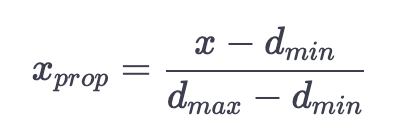

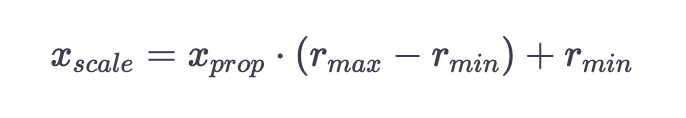

### fit_transform

In [2]:
from sklearn.preprocessing import MinMaxScaler

display(pizza_data)

default_scaler = MinMaxScaler() # the default range is [0,1]a
transformed = default_scaler.fit_transform(pizza_data)

display(transformed)

custom_scaler = MinMaxScaler(feature_range=(-2, 3))
transformed = custom_scaler.fit_transform(pizza_data)

display(transformed)

array([[2100,   10,  800],
       [2500,   11,  850],
       [1800,   10,  760],
       [2000,   12,  800],
       [2300,   11,  810]])

array([[0.42857143, 0.        , 0.44444444],
       [1.        , 0.5       , 1.        ],
       [0.        , 0.        , 0.        ],
       [0.28571429, 1.        , 0.44444444],
       [0.71428571, 0.5       , 0.55555556]])

array([[ 0.14285714, -2.        ,  0.22222222],
       [ 3.        ,  0.5       ,  3.        ],
       [-2.        , -2.        , -2.        ],
       [-0.57142857,  3.        ,  0.22222222],
       [ 1.57142857,  0.5       ,  0.77777778]])

### Transform current data from a fit of different data

In [3]:
pizza_data = np.array([[ 1.2,  3.2],
                       [-0.3, -1.2],
                       [ 6.5, 10.1],
                       [ 2.2, -8.4]])

new_pizza_data = np.array([[ 1.2, -0.5],
                       [ 5.3,  2.3],
                       [-3.3,  4.1]])

display(new_pizza_data)

from sklearn.preprocessing import MinMaxScaler
default_scaler = MinMaxScaler() # the default range is [0,1]
transformed = default_scaler.fit_transform(new_pizza_data)
display(transformed)

default_scaler = MinMaxScaler()  # new instance
default_scaler.fit(pizza_data)  # different data value fit
transformed = default_scaler.transform(new_pizza_data)
display(transformed)

array([[ 1.2, -0.5],
       [ 5.3,  2.3],
       [-3.3,  4.1]])

array([[0.52325581, 0.        ],
       [1.        , 0.60869565],
       [0.        , 1.        ]])

array([[ 0.22058824,  0.42702703],
       [ 0.82352941,  0.57837838],
       [-0.44117647,  0.67567568]])

# Robust Scaling

* Data standardization uses each feature's mean and standard deviation
* Ranged scaling uses the maximum and minimum feature values

Both susceptible to being skewed by outlier values.

We can robustly scale the data, i.e. avoid being affected by outliers, by using use the data's median and Interquartile Range (IQR).

For the scaling method, we just subtract the median from each data value then scale to the IQR.



In [7]:
from sklearn.preprocessing import RobustScaler

data = np.array([[ 1.2,  2.3],
                [ 2.1,  4.2],
                [-1.9,  3.1],
                [-2.5,  2.5],
                [ 0.8,  3. ],
                [ 6.3,  2.1],
                [-1.5,  2.7],
                [ 1.4,  2.9],
                [ 1.8,  3.2]])

display(data)

robust_scaler = RobustScaler()
transformed = robust_scaler.fit_transform(data)

display(transformed)

array([[ 1.2,  2.3],
       [ 2.1,  4.2],
       [-1.9,  3.1],
       [-2.5,  2.5],
       [ 0.8,  3. ],
       [ 6.3,  2.1],
       [-1.5,  2.7],
       [ 1.4,  2.9],
       [ 1.8,  3.2]])

array([[ 0.        , -1.        ],
       [ 0.27272727,  2.16666667],
       [-0.93939394,  0.33333333],
       [-1.12121212, -0.66666667],
       [-0.12121212,  0.16666667],
       [ 1.54545455, -1.33333333],
       [-0.81818182, -0.33333333],
       [ 0.06060606,  0.        ],
       [ 0.18181818,  0.5       ]])

# Normalization

## L2 Normalization
* In certain cases we want to scale the individual data observations (i.e. rows).
* L2 normalization applied to a particular row of a data array will divide each value in that row by the row's L2 norm.
* L2 norm of a row is just the square root of the sum of squared values for the row.

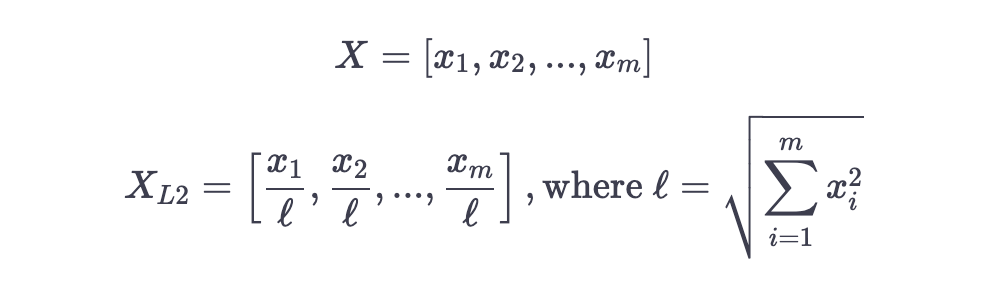

In [13]:
from sklearn.preprocessing import Normalizer

data = np.array([[4, 1, 2, 2],
                 [3, 4, 0, 0],
                 [7, 5, 9, 2]])

display(data)

normalizer = Normalizer()
transformed = normalizer.fit_transform(data)

display(transformed)

array([[4, 1, 2, 2],
       [3, 4, 0, 0],
       [7, 5, 9, 2]])

array([[0.8       , 0.2       , 0.4       , 0.4       ],
       [0.6       , 0.8       , 0.        , 0.        ],
       [0.55513611, 0.39652579, 0.71374643, 0.15861032]])

# Data Imputation
* We often have to deal with data that contains missing values. 
* If only a few of the values are missing, we can perform data imputation to substitute the missing data with some other value(s).
* Many ways of doing it
    * Using the mean value
    * Using the median value
    * Using the most frequent value
    * Filling in missing values with a constant

## Mean Imputation

In [17]:
from sklearn.impute import SimpleImputer

data = np.array([[ 1.,  2., np.nan,  2.],
                [ 5., np.nan,  1.,  2.],
                [ 4., np.nan,  3., np.nan],
                [ 5.,  6.,  8.,  1.],
                [np.nan,  7., np.nan,  0.]])

display(data)

imp_mean = SimpleImputer() # The default Imputation method is - mean
transformed = imp_mean.fit_transform(data)

display(transformed)

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

array([[1.  , 2.  , 4.  , 2.  ],
       [5.  , 5.  , 1.  , 2.  ],
       [4.  , 5.  , 3.  , 1.25],
       [5.  , 6.  , 8.  , 1.  ],
       [3.75, 7.  , 4.  , 0.  ]])

## Median & Most Frequest

In [19]:
from sklearn.impute import SimpleImputer

display(data)

imp_median = SimpleImputer(strategy='median')
transformed = imp_median.fit_transform(data)

display(transformed)

imp_frequent = SimpleImputer(strategy='most_frequent')
transformed = imp_frequent.fit_transform(data)

display(transformed)

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

array([[1. , 2. , 3. , 2. ],
       [5. , 6. , 1. , 2. ],
       [4. , 6. , 3. , 1.5],
       [5. , 6. , 8. , 1. ],
       [4.5, 7. , 3. , 0. ]])

array([[1., 2., 1., 2.],
       [5., 2., 1., 2.],
       [4., 2., 3., 2.],
       [5., 6., 8., 1.],
       [5., 7., 1., 0.]])

## Constant Imputation

In [20]:
from sklearn.impute import SimpleImputer

display(data)

imp_constant = SimpleImputer(strategy='constant', fill_value=-1)
transformed = imp_constant.fit_transform(data)

display(transformed)

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

array([[ 1.,  2., -1.,  2.],
       [ 5., -1.,  1.,  2.],
       [ 4., -1.,  3., -1.],
       [ 5.,  6.,  8.,  1.],
       [-1.,  7., -1.,  0.]])

## Other Imputation Methods

* The __SimpleImputer__ object only implements the four imputation methods shown above
* There are also more advanced imputation methods
    * __k-Nearest Neighbors__ (filling in missing values based on similarity scores from the kNN algorithm)
    * __MICE__ (applying multiple chained imputations, assuming the missing values are randomly distributed across observations).

# PCA - Principal Component Analysis

## Dimensionality Reduction

* When you have correlated columns of data - we can perform principal component analysis (PCA) for dimensionality reduction (i.e. reducing the number of columns in the data array).

* PCA extracts the principal components of the dataset, which are an uncorrelated set of latent variables that encompass most of the information from the original dataset.

* Using a smaller set of principal components can make it a lot easier to use the dataset in statistical or machine learning models

## PCA in scikit-learn

In [26]:
from sklearn.decomposition import PCA

data = np.array([[ 1.5,  3. ,  9. , -0.5,  1.],
                [ 2.2,  4.3,  3.5,  0.6,  2.7],
                [ 3. ,  6.1,  1.1,  1.2,  4.2],
                [ 8. , 16. ,  7.7, -1. ,  7.1]])

pca_obj = PCA() # The value of n_component will be 4. As m is 5 and default is always m-1
pc = pca_obj.fit_transform(data).round(3)

display(pc)

pca_obj = PCA(n_components=3)
pc = pca_obj.fit_transform(data).round(3)

display(pc)

pca_obj = PCA(n_components=2)
pc = pca_obj.fit_transform(data).round(3)

display(pc)

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02,  0.0000e+00],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01,  0.0000e+00],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02,  0.0000e+00],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03,  0.0000e+00]])

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03]])

array([[-4.86 ,  4.63 ],
       [-3.799, -1.318],
       [-1.863, -4.226],
       [10.522,  0.914]])

# Labeled Data

## Class Labels

In [33]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
display(bc.data)
display(bc.data.shape)

# Class labels
display(bc.target)
display(bc.target.shape)

# Label names
display(list(bc.target_names))

malignant = bc.data[bc.target == 0]
display(malignant.shape)

benign = bc.data[bc.target == 1]
display(benign.shape)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

(569, 30)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

(569,)

['malignant', 'benign']

(212, 30)

(357, 30)